In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<ipython-input-3-cb152552b002>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


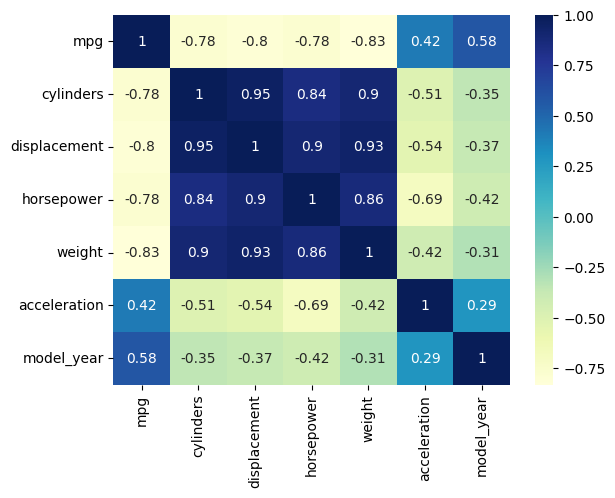

In [3]:
# only numeric columns
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

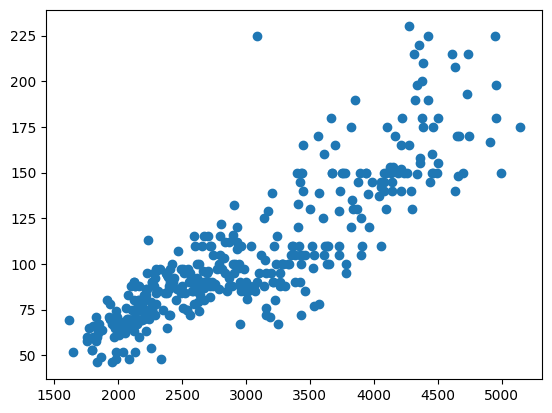

In [4]:
plt.scatter(x='weight', y='horsepower', data=df)

In [5]:
# Split our data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [6]:
# Define the OLS equation
ols_formula = "horsepower ~ weight"

# Fit the OLS model
ols_model = smf.ols(formula=ols_formula, data=train_data).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     847.6
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           8.00e-91
Time:                        01:39:10   Log-Likelihood:                -1371.1
No. Observations:                 313   AIC:                             2746.
Df Residuals:                     311   BIC:                             2754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6694      4.031     -2.398      0.0

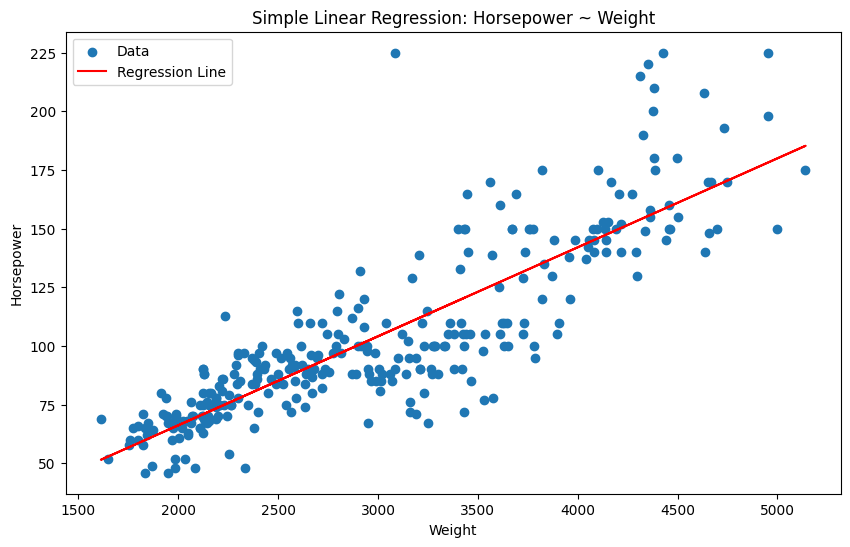

In [7]:
# Get the regression coefficients
slope = ols_model.params['weight']
intercept = ols_model.params['Intercept']

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(train_data['weight'], train_data['horsepower'], label='Data')
plt.plot(train_data['weight'], slope * train_data['weight'] + intercept, color='red', label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Simple Linear Regression: Horsepower ~ Weight')
plt.legend()
plt.show()

In [8]:
r_squared = ols_model.rsquared
print("R-squared:", r_squared)

R-squared: 0.7315810077564338


In [9]:
# Try it again with more predictors
ols_formula = "horsepower ~ mpg + cylinders + weight + acceleration"

# Fit the OLS model
ols_model = smf.ols(formula=ols_formula, data=train_data).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     553.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          3.58e-139
Time:                        01:39:10   Log-Likelihood:                -1247.9
No. Observations:                 313   AIC:                             2506.
Df Residuals:                     308   BIC:                             2525.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      112.3859      9.809     11.458   

In [10]:
r_squared = ols_model.rsquared
print("R-squared:", r_squared)

R-squared: 0.8777802386437321
